# **Weather Data Analysis**

Weather data plays a crucial role in our daily lives and various industries, from agriculture to transportation and emergency preparedness.
Understanding and effectively utilizing weather data can help individuals and organizations make informed decisions, improve safety,
and optimize operations.

Types of Weather

* Temperature: Information about the current and forecasted temperature, which impacts clothing choices, heating and cooling needs, and agricultural practices.

*  Precipitation: Data on rainfall, snowfall, and other forms of precipitation, critical for water resource management, flood forecasting, and agricultural planning.

* Humidity: Measures the amount of moisture in the air, influencing human comfort, crop health, and weather patterns.

* Wind Speed and Direction: Wind data is vital for aviation, renewable energy generation, and understanding weather patterns.

* Atmospheric Pressure: Information about the pressure exerted by the atmosphere, useful for weather predictions and altimeter settings for aviation.

*  Cloud Cover: Indicates the fraction of the sky covered by clouds and helps determine potential rainfall and solar radiation.

* UV Index: Measures the strength of ultraviolet radiation from the sun, important for skin protection and outdoor activities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, gc, joblib
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Weather Data.csv')

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.shape

(8784, 8)

In [5]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Checking the null values

In [6]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
df.duplicated().sum()

0

Skewness of Temp_C: -0.17766634898276745
kurtosis of Temp_C: -0.9155567505542197


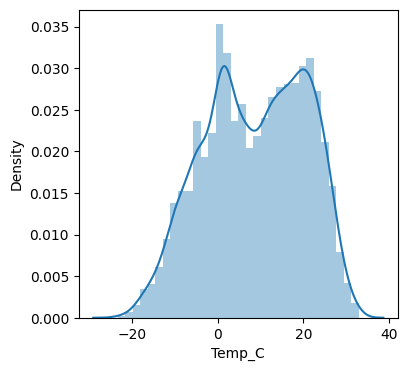

Skewness of Dew Point Temp_C: -0.31843338608156885
kurtosis of Dew Point Temp_C: -0.8157875944814732


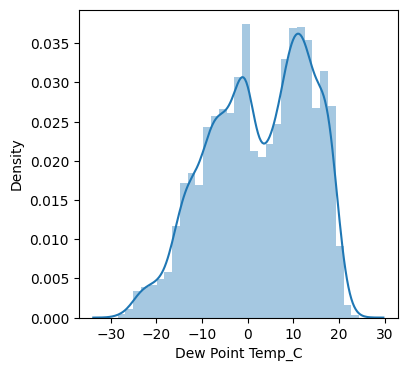

Skewness of Rel Hum_%: -0.32383026939145887
kurtosis of Rel Hum_%: -0.5529352317433536


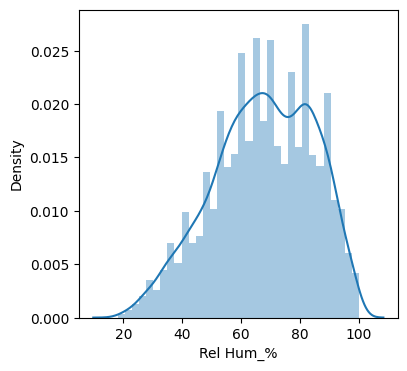

Skewness of Wind Speed_km/h: 0.8713742625776061
kurtosis of Wind Speed_km/h: 1.5407125247939306


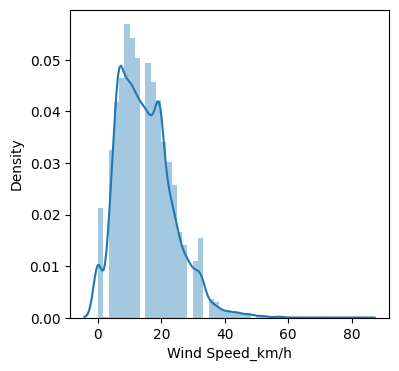

Skewness of Visibility_km: 0.41336159676061063
kurtosis of Visibility_km: -0.35103132005897164


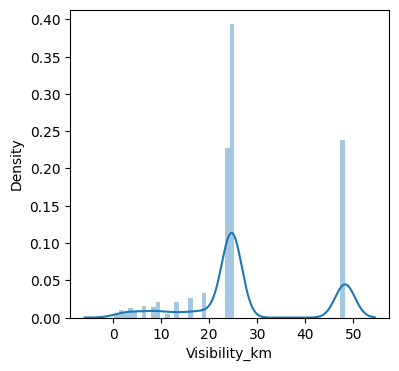

Skewness of Press_kPa: -0.22992511978286803
kurtosis of Press_kPa: 0.7144508236613349


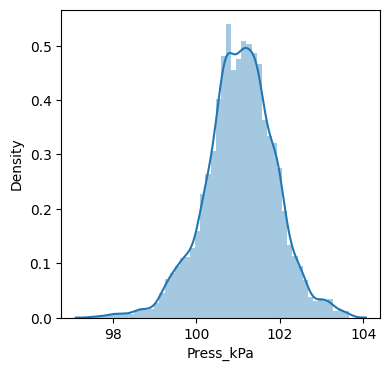

In [8]:
for col in df.select_dtypes(np.number).columns:
  plt.figure(figsize=(14,4))
  print(f'Skewness of {col}:',df[col].skew())
  print(f'kurtosis of {col}:',df[col].kurtosis())

  plt.subplot(131)
  sns.distplot(df[col])
  plt.show()

Temperature Distribution

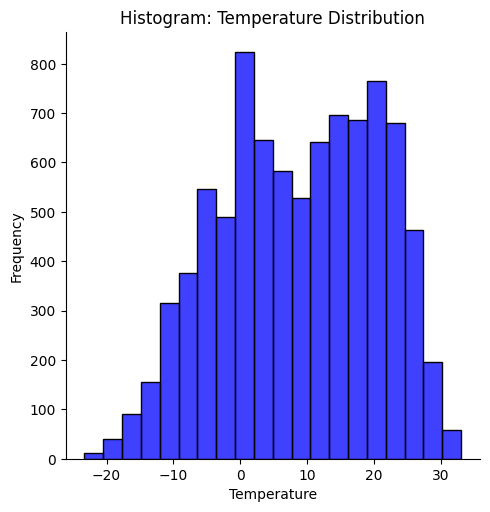

In [9]:
sns.displot(data=df,x='Temp_C',color='blue',bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram: Temperature Distribution')
plt.show()

Temperature vs Dew point Temp

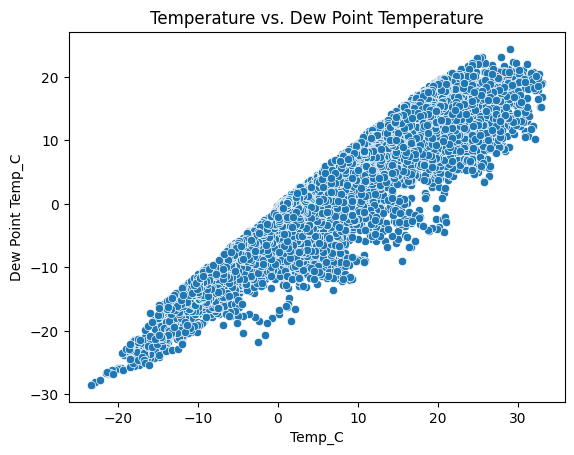

In [30]:
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=df)
plt.title('Temperature vs. Dew Point Temperature')
plt.show()

Wind Speed vs Visibility

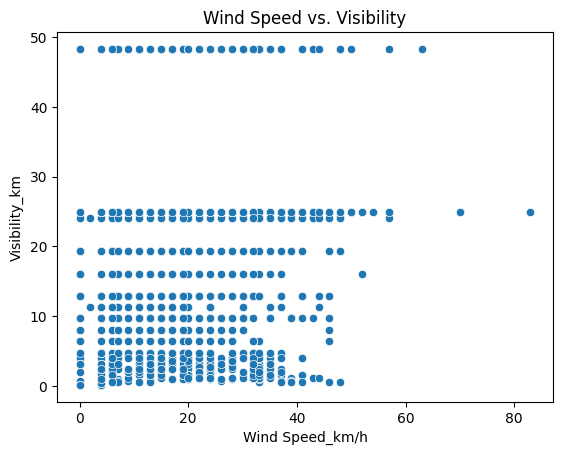

In [32]:
sns.scatterplot(x='Wind Speed_km/h', y='Visibility_km', data=df)
plt.title('Wind Speed vs. Visibility')
plt.show()

Correlation

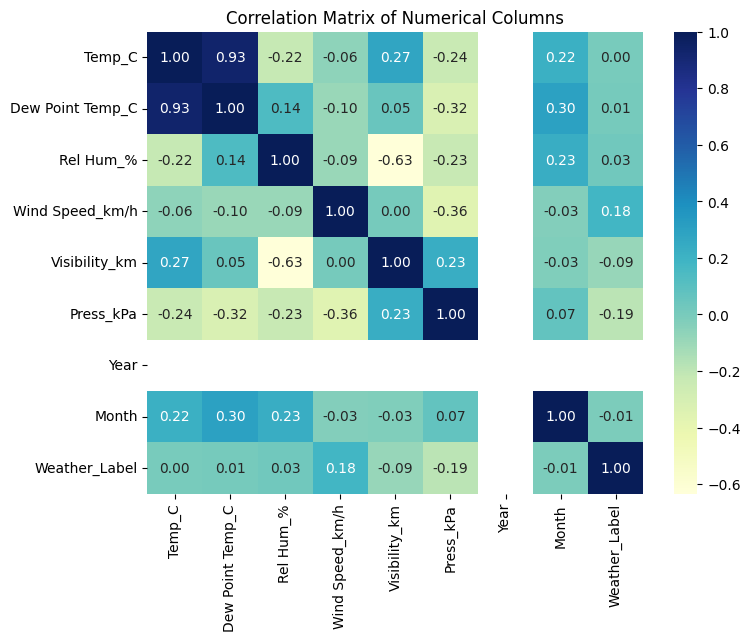

In [33]:
#numerical columns
numericals_columns = df.select_dtypes(include=np.number)

#calculatingthe correlation matrix
correlation_matrix = numericals_columns.corr()

#plotting
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

#title
plt.title('Correlation Matrix of Numerical Columns')

plt.show()

Wind Speed Distribution

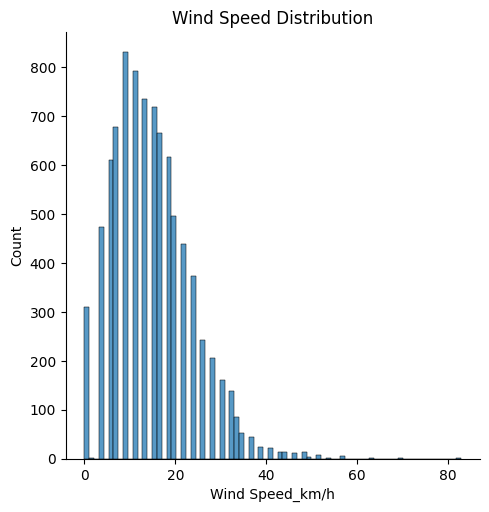

In [34]:
sns.displot(data=df,x='Wind Speed_km/h')
plt.title('Wind Speed Distribution')
plt.show()

In [13]:
df['Weather']

0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object

Weather Types

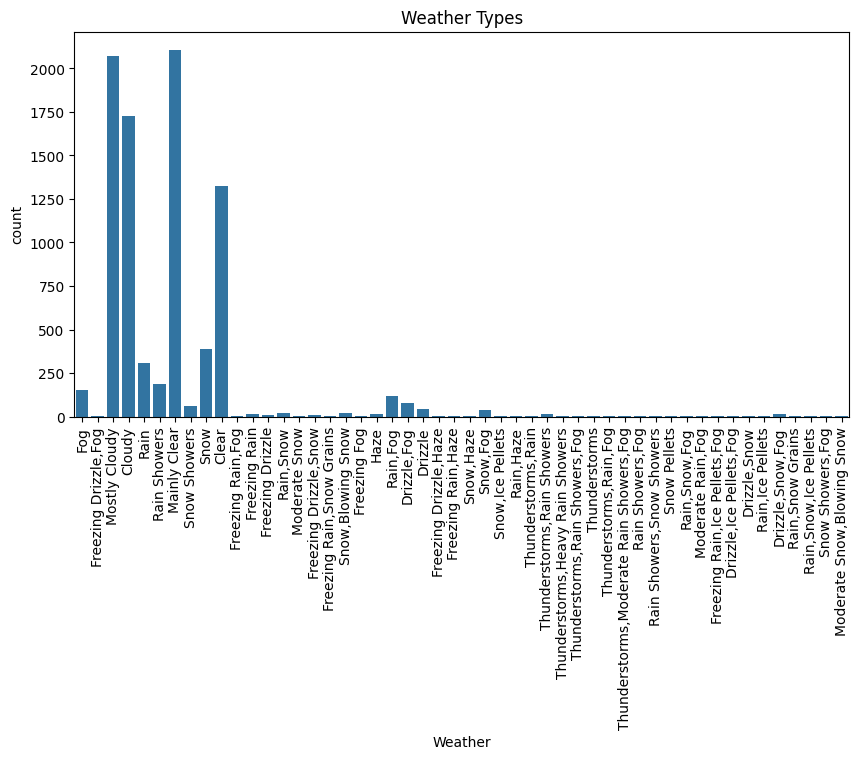

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Weather', data=df)
plt.xticks(rotation=90)
plt.title('Weather Types')
plt.show()

Stacked Area Chart of Weather Categories over Time

<Figure size 2000x2000 with 0 Axes>

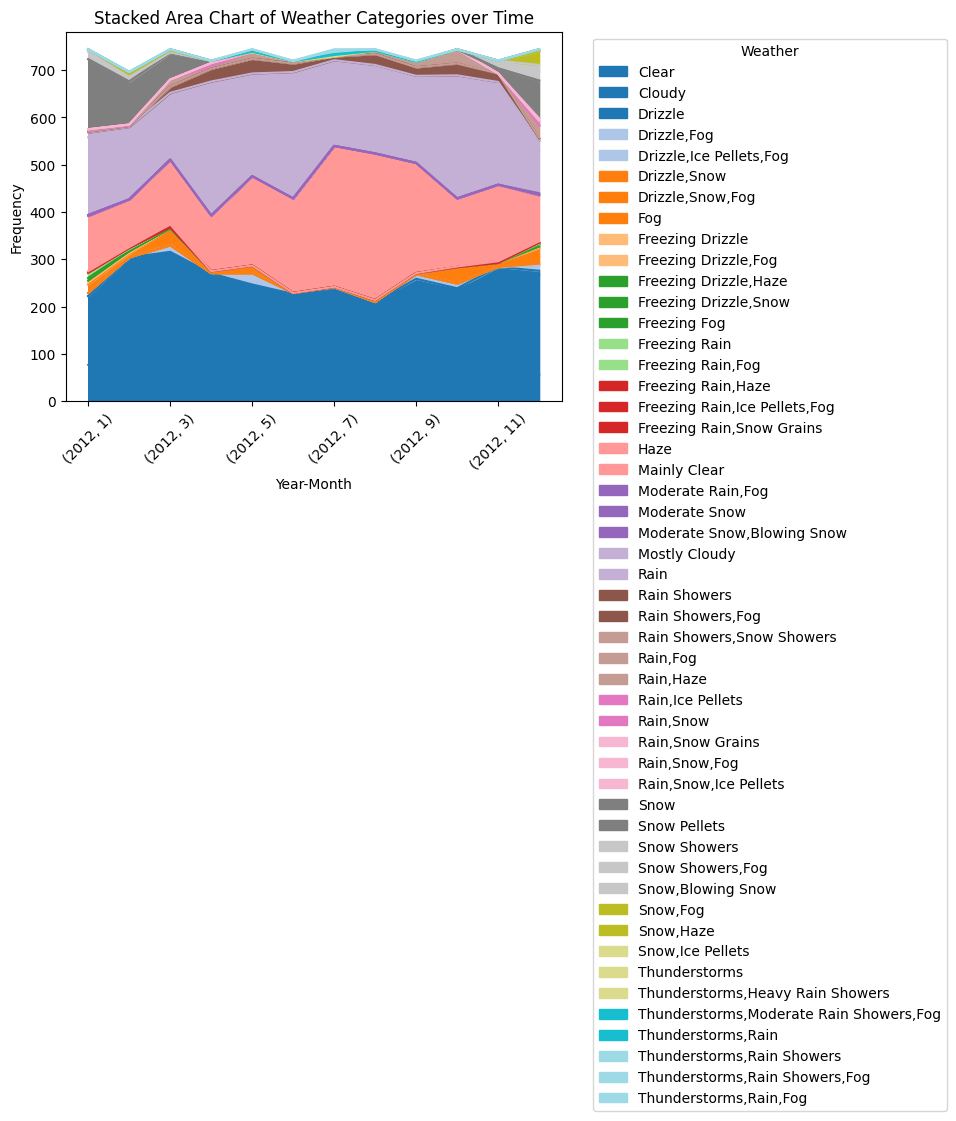

In [35]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month

weather_counts_by_month = df.groupby(['Year','Month','Weather'])['Weather'].count().unstack(fill_value=0)

plt.figure(figsize=(20,20))
weather_counts_by_month.plot.area(stacked=True, colormap='tab20')

plt.title('Stacked Area Chart of Weather Categories over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.legend(title='Weather',bbox_to_anchor=(1.05,1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Temperature Variation Over Time

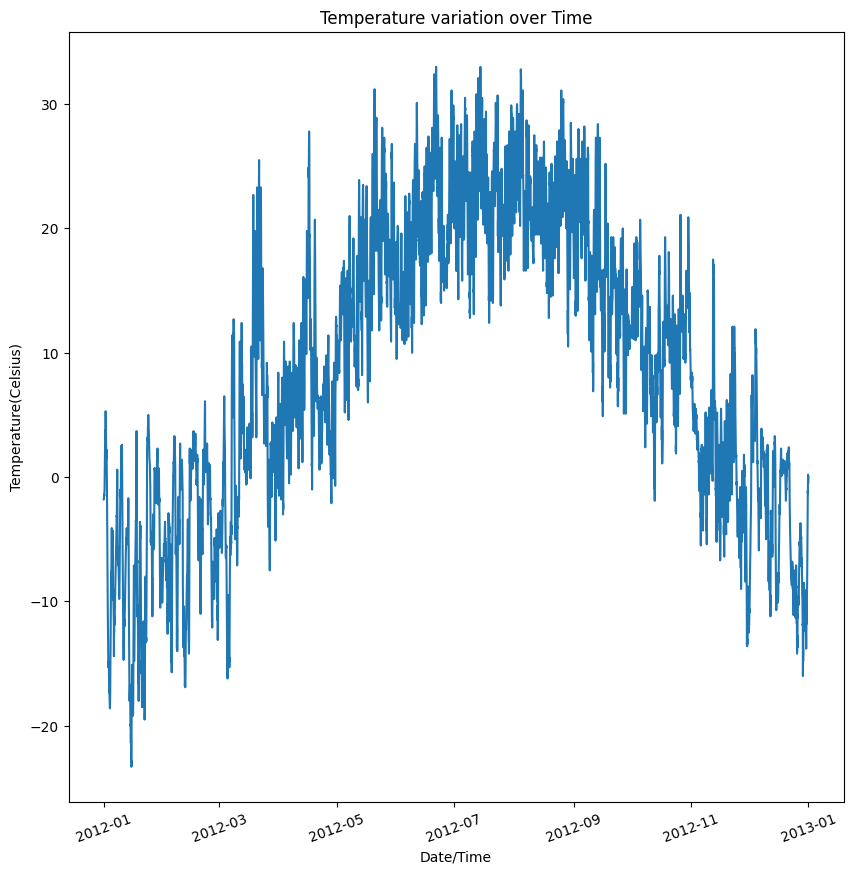

In [36]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

plt.figure(figsize=(10,10))
sns.lineplot(x='Date/Time',y='Temp_C',data=df)
plt.title('Temperature variation over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature(Celsius)')
plt.xticks(rotation=20)
plt.show()

Temperature variation by Weather types

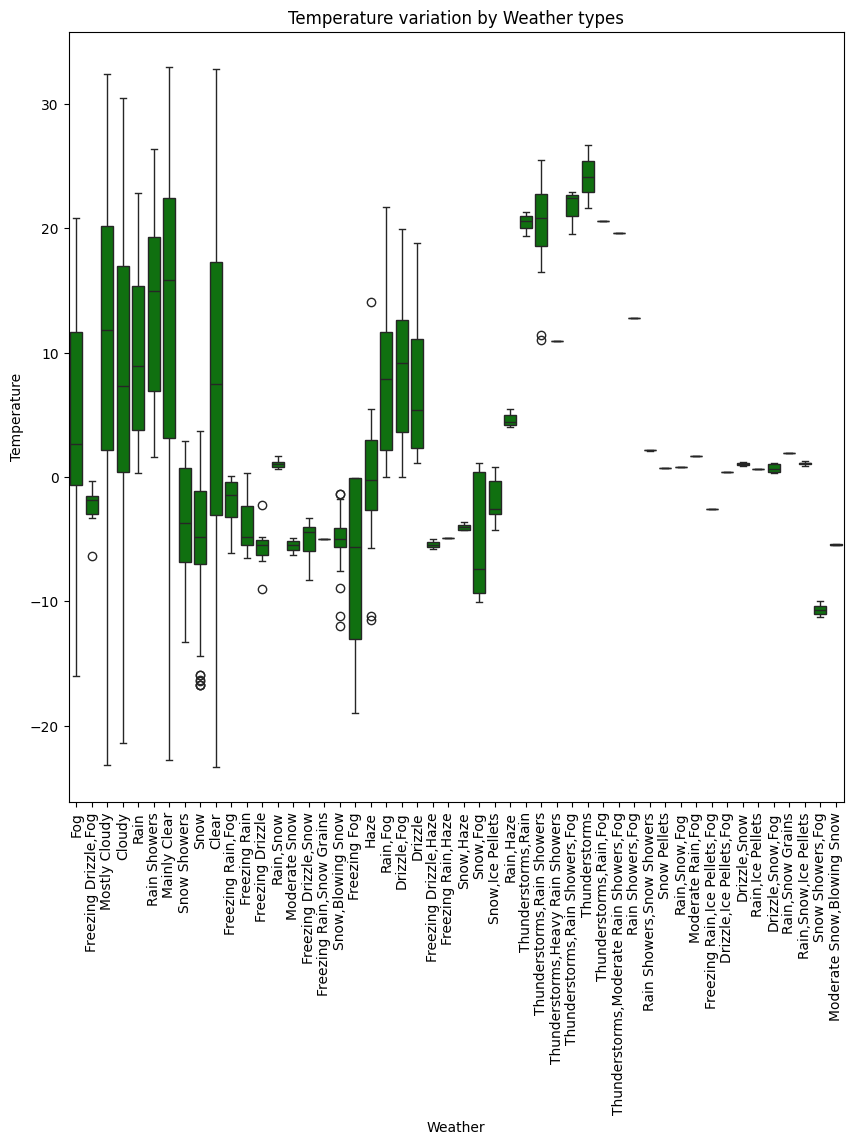

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Weather',y='Temp_C', data=df, color='green')
plt.title('Temperature variation by Weather types')
plt.xlabel('Weather')
plt.ylabel('Temperature')
plt.xticks(rotation=90)
plt.show()

Joint distribution of Temperature and Relative Humidity

<Figure size 800x600 with 0 Axes>

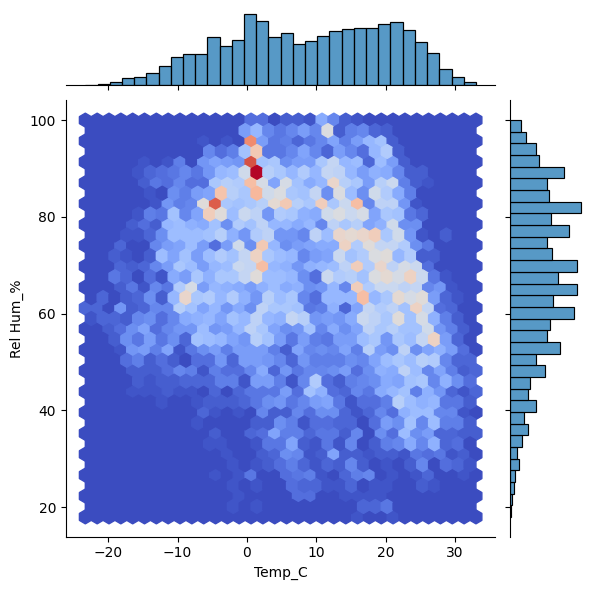

In [40]:
plt.figure(figsize=(8, 6))
sns.jointplot(x='Temp_C', y='Rel Hum_%', data=df, kind='hex', cmap='coolwarm')
plt.show()

Prediction of Weather

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Encoding

In [19]:
label_encoder = LabelEncoder()
df['Weather_Label'] = label_encoder.fit_transform(df['Weather'])

median_wind_speed = df['Wind Speed_km/h'].loc[df['Wind Speed_km/h'] != 'Calm'].median()
df.loc[df['Wind Speed_km/h'] == 'Calm', 'Wind Speed_km/h'] = median_wind_speed
df['Wind Speed_km/h'] = df['Wind Speed_km/h'].astype(float)

X = df.drop(['Weather', 'Date/Time', 'Weather_Label'], axis=1)
y = df['Weather_Label']

In [20]:
scaler = StandardScaler()
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

Data Splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models

In [25]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [26]:
classifiers = [logistic_regression, decision_tree, random_forest, gradient_boosting]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

Confusion Matrix

In [27]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()

Logistic Regression Accuracy: 0.32498577120091066


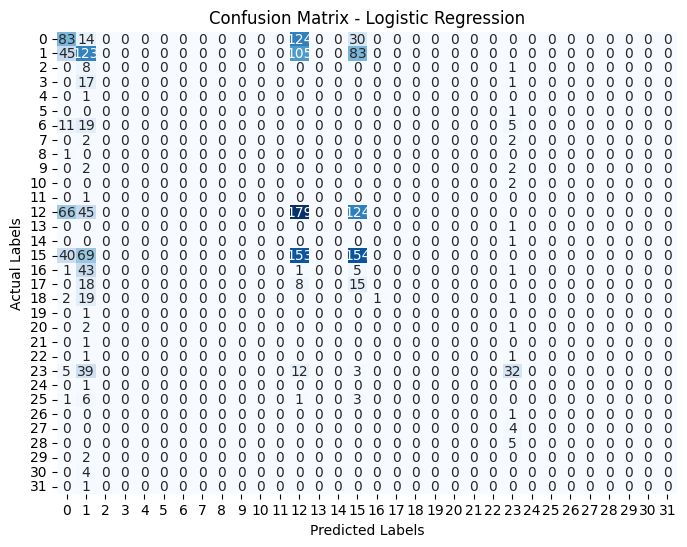

Decision Tree Accuracy: 0.49231644849174727


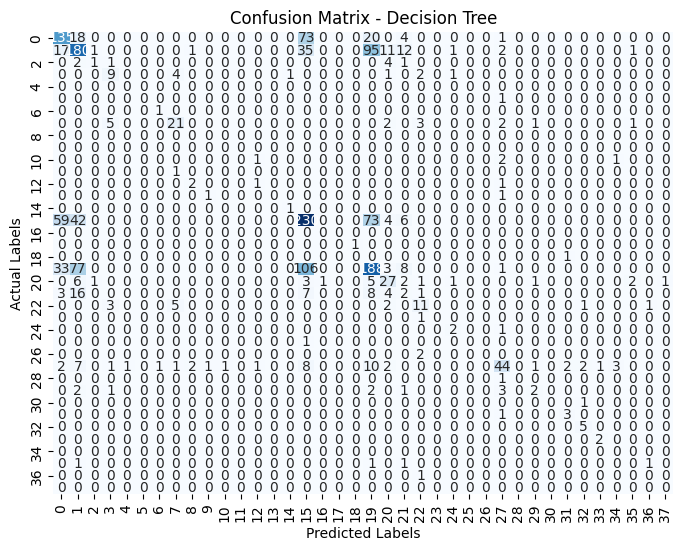

Random Forest Accuracy: 0.5776892430278885


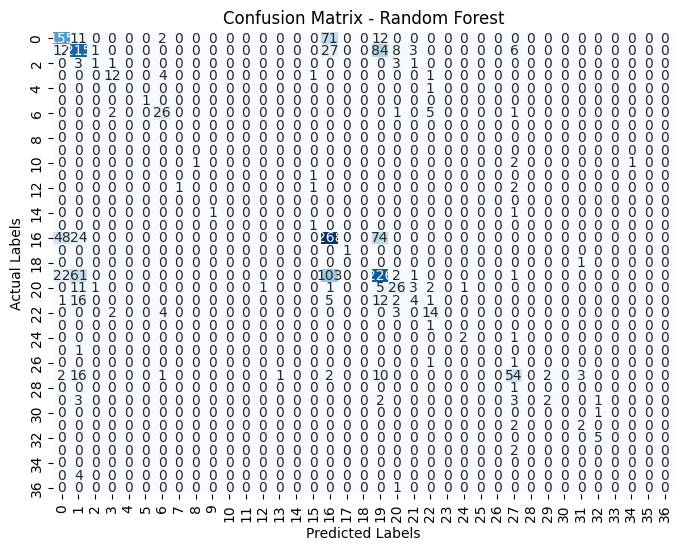

Gradient Boosting Accuracy: 0.4348321001707456


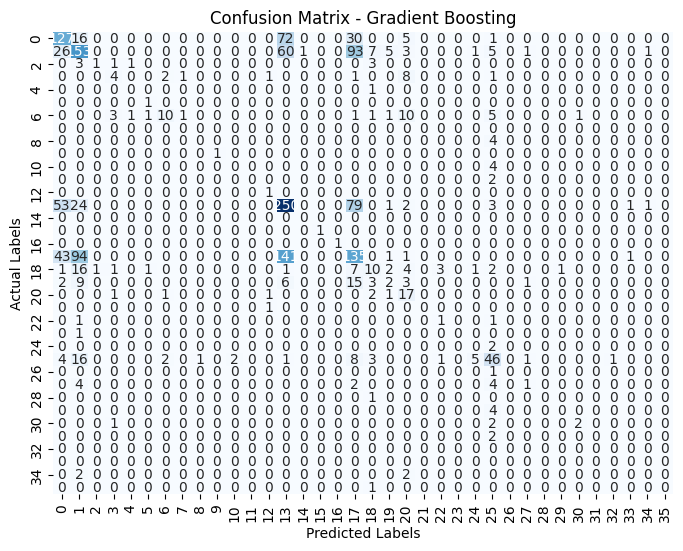

In [28]:
accuracy_scores = []
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    plot_confusion_matrix(y_test_labels, y_pred_labels, f'Confusion Matrix - {name}')

Comparsion of Accuracies

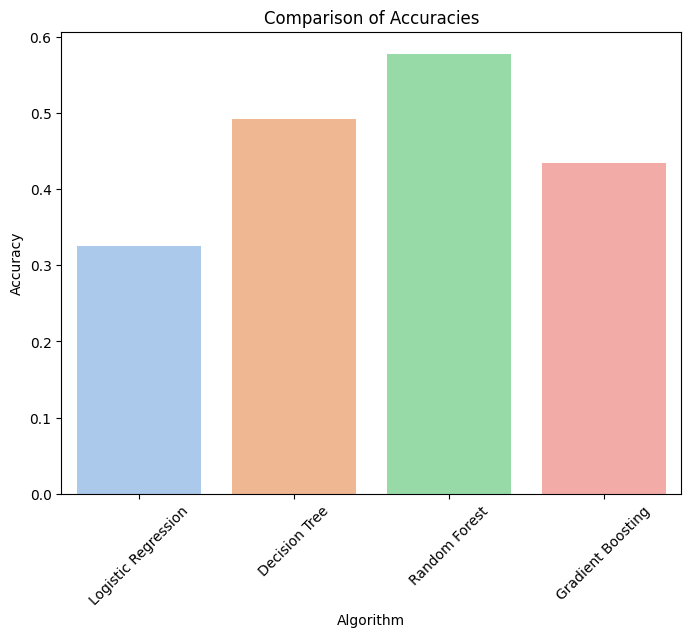

In [41]:
accuracy_df = pd.DataFrame({'Algorithm': classifier_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='pastel')
plt.title('Comparison of Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Insights

The Random Forest model has the highest accuracy among the three models, achieving approximately 62.27%. This suggests that, based on accuracy alone, the Random Forest model performs the best on this particular dataset compared to Logistic Regression and Decision Tree models.

Accuracy Interpretation:

* Moderate Accuracy:
The accuracy scores, in general, are not exceptionally high. This could indicate the complexity or nature of the dataset, implying that the models might struggle to accurately predict the target variable based on the given features.

* Decision Tree and Logistic Regression Performances:
Decision Tree outperforms Logistic Regression but falls short compared to Random Forest. Logistic Regression tends to be a simpler model, and its lower accuracy might suggest that the relationships between features and the target might not be linear.